In [2]:
import requests

In [5]:
path = "https://www.la-spa.fr/app/wp-json/spa/v1/animals/count/?api=1"
response = requests.get(path)
response.json()['count']


3505

In [69]:
path = "https://www.la-spa.fr/app/wp-json/spa/v1/establishments/?api=1&types=refuges,maisons-spa&lat=&lng="
response = requests.get(path)
refuges = response.json()['items']
df = pd.DataFrame(refuges)
df.to_json('data/laspa_refuges.json')
df.to_csv('data/laspa_refuges.csv')

In [68]:
url = f'https://www.la-spa.fr/app/wp-json/spa/v1/animals/search/?api=1&paged=1&seed=1'
response = requests.get(url)
elements = response.json()['results']
print("1", len(elements))

page = 2
while page <= response.json()['nb_pages']:
    url = f'https://www.la-spa.fr/app/wp-json/spa/v1/animals/search/?api=1&paged={page}&seed=1'
    response = requests.get(url)
    for elem in response.json()['results']:
        elements.append(elem)
    print(page, len(elements))
    page += 1

df = pd.DataFrame(elements)
df.to_json('data/laspa_animaux.json')
df.to_csv('data/laspa_animaux.csv')


,ID,name,address,latitude,longitude,opening_hours,filter,image,email,phone,url,contact
0,7351,Grand Refuge SPA de Pervenchères,Lieu-dit La Chevrie<br>61360 Pervenchères,48.432071685791016,0.4031769931316376,Le Grand Refuge SPA est ouvert du lundi au ven...,"{'ID': 23, 'name': 'Refuges', 'color': 'green'...",{'desktop': {'src': 'https://www.la-spa.fr/app...,,02 33 83 08 66,/etablissement/grand-refuge-spa-de-pervencheres/,/contact-etablissement/?establishment=grand-re...
1,7352,Refuge SPA de Laon - Des Prés de Longuevalle,Chemin de la Croix de Chivy<br>02000 Laon,49.55644502399694,3.6378486996861357,Ouvert au public tous les jours au public de 1...,"{'ID': 23, 'name': 'Refuges', 'color': 'green'...",{'desktop': {'src': 'https://www.la-spa.fr/app...,,03 23 20 42 54,/etablissement/refuge-spa-de-laon-des-pres-de-...,/contact-etablissement/?establishment=refuge-s...
2,7353,Refuge SPA de Montluçon - La Loue,67 rue de la Loue<br>03100 Montluçon,46.369895198439956,2.5967036687921263,Ouvert tous les jours sauf les jeudis et certa...,"{'ID': 23, 'name': 'Refuges', 'color': 'green'...",{'desktop': {'src': 'https://www.la-spa.fr/app...,,04 70 29 63 23,/etablissement/refuge-spa-de-montlucon-la-loue/,/contact-etablissement/?establishment=refuge-s...
3,7354,Refuge SPA de Brugheas - Vichy,9 bis La Boucharde<br>03700 Brugheas,46.069611743225096,3.3815094488383757,"Le refuge est ouvert au public le lundi, mercr...","{'ID': 23, 'name': 'Refuges', 'color': 'green'...",{'desktop': {'src': 'https://www.la-spa.fr/app...,,04 70 32 43 42,/etablissement/refuge-spa-de-brugheas-vichy/,/contact-etablissement/?establishment=refuge-s...
4,7355,Refuge SPA de Briançon - Le Chazal,181 rue des Fontainiers<br>05100 Briançon,44.879458298218786,6.6203012732921716,Ouvert tous les jours de 15h à 17h30.,"{'ID': 23, 'name': 'Refuges', 'color': 'green'...",{'desktop': {'src': 'https://www.la-spa.fr/app...,,04 92 21 15 29,/etablissement/refuge-spa-de-briancon-le-chazal/,/contact-etablissement/?establishment=refuge-s...
...,...,...,...,...,...,...,...,...,...,...,...,...
59,7346,Maison SPA d’Ajaccio,18 cours Général Leclerc<br>20000 Ajaccio,41.917238843838966,8.726867028413741,La Maison SPA vous accueille du lundi au vendr...,"{'ID': 24, 'name': 'Maisons SPA', 'color': 'br...",{'desktop': {'src': 'https://www.la-spa.fr/app...,,04 95 28 13 04,/etablissement/maison-spa-dajaccio/,/contact-maison-spa/?establishment=maison-spa-...
60,7347,Maison SPA de Bordeaux,64 rue Fondaudège<br>33000 Bordeaux,44.847500874404325,-0.5814355759380796,La Maison SPA vous accueille du mardi au samed...,"{'ID': 24, 'name': 'Maisons SPA', 'color': 'br...",{'desktop': {'src': 'https://www.la-spa.fr/app...,,05 57 83 28 77,/etablissement/maison-spa-de-bordeaux/,/contact-maison-spa/?establishment=maison-spa-...
61,7348,Maison SPA de Lons-Le-Saunier,Devenue refuge de Beaurepaire-en-Bresse - ZA L...,46.66851,5.3883,"Ouvert de 14h à 17h30 tous les jours, sauf le ...","{'ID': 24, 'name': 'Maisons SPA', 'color': 'br...",{'desktop': {'src': 'https://www.la-spa.fr/app...,,03 84 24 82 20,/etablissement/maison-spa-de-lons-le-saunier/,/contact-maison-spa/?establishment=maison-spa-...
62,7349,Maison SPA de Tourcoing,5 place de la Croix Rouge<br>59200 Tourcoing,50.73222330359827,3.1800660006894654,La Maison SPA vous accueille du mardi au vendr...,"{'ID': 24, 'name': 'Maisons SPA', 'color': 'br...",{'desktop': {'src': 'https://www.la-spa.fr/app...,,03 20 25 54 55,/etablissement/maison-spa-de-tourcoing/,/contact-maison-spa/?establishment=maison-spa-...


In [16]:
refuges[0]

{'ID': '7351',
 'name': 'Grand Refuge SPA de Pervenchères',
 'address': 'Lieu-dit La Chevrie<br>61360 Pervenchères',
 'latitude': '48.432071685791016',
 'longitude': '0.4031769931316376',
 'opening_hours': 'Le Grand Refuge SPA est ouvert du lundi au vendredi de 13h30 à 17h30, et les week-end de 10h à 17h30. Il est fermé au public du 30 octobre au 31 mars (sauf pour les adoptants).',
 'filter': {'ID': 23,
  'name': 'Refuges',
  'color': 'green',
  'icon': {'color': {'src': 'https://www.la-spa.fr/app/assets-spa/themes/spa/assets/img/icons/map/refuge.svg',
    'alt': ''},
   'light': {'src': 'https://www.la-spa.fr/app/assets-spa/themes/spa/assets/img/icons/map/refuge-light.svg',
    'alt': ''}}},
 'image': {'desktop': {'src': 'https://www.la-spa.fr/app/assets-spa/uploads/2021/09/Grand-Refuge.jpg',
   'alt': '',
   'webp': 'https://www.la-spa.fr/app/assets-spa/uploads/2021/09/Grand-Refuge.jpg.webp'},
  'mobile': {'src': 'https://www.la-spa.fr/app/assets-spa/uploads/2021/09/Grand-Refuge.jpg

In [29]:
for refuge in refuges:
    slug_items = refuge['url'].split('/')
    slug = f'establishment-{slug_items[2]}'
    url = f'https://www.la-spa.fr/app/wp-json/spa/v1/posts/?api=1&_uid={slug}'
    response = requests.get(url)
    if response.status_code != 200 :
        print(slug)

In [33]:
response.json().keys()

dict_keys(['filters', 'nb_pages', 'total', 'results'])

1 18
2 36
3 54
4 72
5 90
6 108
7 126
8 144
9 162
10 180
11 198
12 216
13 234
14 252
15 270
16 288
17 306
18 324
19 342
20 360
21 378
22 396
23 414
24 432
25 450
26 468
27 486
28 504
29 522
30 540
31 558
32 576
33 594
34 612
35 630
36 648
37 666
38 684
39 702
40 720
41 738
42 756
43 774
44 792
45 810
46 828
47 846
48 864
49 882
50 900
51 918
52 936
53 954
54 972
55 990
56 1008
57 1026
58 1044
59 1062
60 1080
61 1098
62 1116
63 1134
64 1152
65 1170
66 1188
67 1206
68 1224
69 1242
70 1260
71 1278
72 1296
73 1314
74 1332
75 1350
76 1368
77 1386
78 1404
79 1422
80 1440
81 1458
82 1476
83 1494
84 1512
85 1530
86 1548
87 1566
88 1584
89 1602
90 1620
91 1638
92 1656
93 1674
94 1692
95 1710
96 1728
97 1746
98 1764
99 1782
100 1800
101 1818
102 1836
103 1854
104 1872
105 1890
106 1908
107 1926
108 1944
109 1962
110 1980
111 1998
112 2016
113 2034
114 2052
115 2070
116 2088
117 2106
118 2124
119 2142
120 2160
121 2178
122 2196
123 2214
124 2232
125 2250
126 2268
127 2286
128 2304
129 2322
130 234

In [45]:
df = pd.DataFrame(data=elements)

In [58]:
df['name'] = df['name'].apply(lambda x : x.title())

In [66]:
df['name']

0                  Pilou
1         Ryson Haa23553
2                 Grizly
3                  Elton
4         Timmy Pab24762
              ...       
3506    Tequila Hab16022
3507              Diesel
3508                Cric
3509       Leon Paa21309
3510     Razor Chao11740
Name: name, Length: 3511, dtype: object

In [64]:
vc = df['name'].value_counts()

In [60]:
n = df[df['name'].isin(vc[vc > 2].keys())]['name'].unique()
n.sort()
n

array(['Alpha', 'Bella', 'Belle', 'Billy', 'Chanel', 'Chipie', 'Choco',
       'Cookie', 'Daisy', 'Diablo', 'Emmy', 'Felix', 'Filou', 'Flash',
       'Gaspard', 'Goliath', 'Guizmo', 'Gustave', 'Happy', 'Hope', 'Isis',
       'Jack', 'Jackson', 'Jazz', 'Jerry', 'Jessy', 'Joker', 'Joy',
       'Jules', 'Junior', 'Lady', 'Leon', 'Lili', 'Lisbonne', 'Lola',
       'Louna', 'Lucky', 'Lune', 'Maestro', 'Magnum', 'Maiko', 'Marcel',
       'Marcus', 'Marley', 'Max', 'Maya', 'Mickey', 'Mimi', 'Molly',
       'Nala', 'Narco', 'Naya', 'Nikita', 'Nina', 'Nino', 'Olaf',
       'Olympe', 'Orion', 'Oscar', 'Pacha', 'Paco', 'Peter', 'Phoenix',
       'Pilou', 'Polly', 'Pomme', 'Popeye', 'Prince', 'Prune', 'Pumba',
       'Ragnar', 'Rasta', 'Rex', 'Rio', 'Rita', 'Roby', 'Rocky', 'Rose',
       'Roxy', 'Saiko', 'Sam', 'Samy', 'Sherlock', 'Simba', 'Snoop',
       'Snoopy', 'Snow', 'Stella', 'Sultan', 'Sushi', 'Tao', 'Taz',
       'Tempo', 'Thor', 'Tigrou', 'Timon', 'Tina', 'Titan', 'Titi',
       'Titou'

<AxesSubplot: >

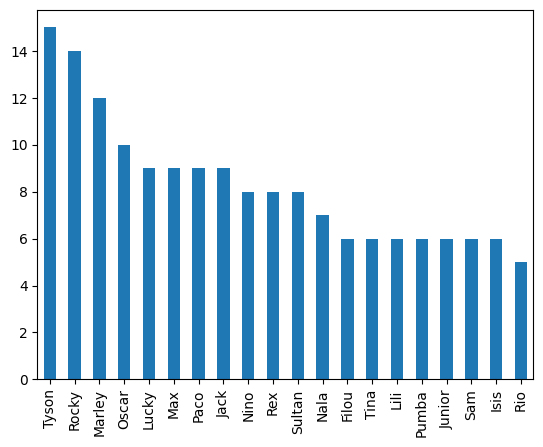

In [65]:
vc[:20].plot.bar()